## Step 1: Importing Required Libraries

In [1]:
#import needed libraries

from bs4 import BeautifulSoup
import requests
import urllib.parse 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import rcParams
import seaborn as sns
import plotly.express as px
import time



## Step 2: Web Scrapping

In [2]:
#store website into a variable "webUrl"

webUrl = 'https://ai-jobs.net/analyst-jobs/'

In [3]:
#make request to the website specified above

response = requests.get(webUrl)

In [4]:
#confirm if the request made was successful

response.status_code

200

In [5]:
#create a soup object to get access to the html content of the website

soup = BeautifulSoup(response.content, 'html.parser')

In [6]:
# See the first 20000-40000 characters

print(soup.prettify()[20000:40000])  

="d-flex justify-content-end">
         <a class="btn btn-outline-primary px-2 my-auto" href="/">
          Reset
         </a>
         <button class="btn btn-outline-primary px-2 ms-1 ms-sm-2 my-auto" onclick="copyLink(event);" type="button">
          Share
         </button>
         <a class="btn btn-outline-primary px-2 ms-1 ms-sm-2 my-auto" href="/job/email/create/?key=&amp;exp=&amp;cat=12">
          Subscribe
         </a>
         <button class="btn btn-primary p2-3 px-sm-4 ms-1 ms-sm-2 my-auto">
          <i class="fas fa-search d-none d-sm-inline me-1">
          </i>
          Search
         </button>
        </span>
       </div>
      </form>
     </div>
    </div>
    <div class="row">
     <div class="col-lg-10 mx-auto">
      <ul class="list-group list-group-flush mb-4" id="job-list">
       <li class="list-group-item list-group-item-action p-1">
        <div class="row">
         <div class="col-2 col-sm-1 py-2">
          <a href="/jobs-at-aptitude-experts/" rel="n

In [7]:

# List where we will keep the results
job_listings = []

# Determine how many pages to visit (for example 5 pages)
for page in range(1, 7):
    url = webUrl.format(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    job_cards = soup.find_all('li', {'class': 'list-group-item'})  # Job posting boxes

    for job in job_cards:
        try:
            title = job.find('h5').get_text(strip=True)
        except:
            title = None

        try:
            company = job.find('span', class_='text-muted').get_text(strip=True)
        except:
            company = None

        try:
            location = job.find('span', class_='text-break').get_text(strip=True)
        except:
            location = None

        try:
            job_type = job.find('span', class_='text-bg-secondary').get_text(strip=True)
        except:
            job_type = None

        try:
            level = job.find('span', class_='text-bg-info').get_text(strip=True)
        except:
            level = None

        try:
            salary = job.find('span', class_='text-bg-success').get_text(strip=True)
        except:
            salary = None

        try:
            skills = [tag.get_text(strip=True) for tag in job.find_all('span', class_='text-bg-light')]
        except:
            skills = []

        job_listings.append({
            "Job Title": title,
            "Company": company,
            "Location": location,
            "Job Type": job_type,
            "Seniority Level": level,
            "Salary Range": salary,
            "Skills": ', '.join(skills)
        })

    print(f"✅ {page}. page completed, {len(job_listings)} total job posting data pulled.")
    time.sleep(1)

# DataFrame oluştur
df = pd.DataFrame(job_listings)
print(f"\nA total of {len(df)} job postings were successfully pulled!")

# CSV’ye kaydet (isteğe bağlı)
df.to_csv("job_listings.csv", index=False)


✅ 1. page completed, 51 total job posting data pulled.
✅ 2. page completed, 102 total job posting data pulled.
✅ 3. page completed, 153 total job posting data pulled.
✅ 4. page completed, 204 total job posting data pulled.
✅ 5. page completed, 255 total job posting data pulled.
✅ 6. page completed, 306 total job posting data pulled.

A total of 306 job postings were successfully pulled!


## Step 3: Data Analysis

In [8]:
#Check data

df.head(15)

,Job Title,Company,Location,Job Type,Seniority Level,Salary Range,Skills
0,Installation Analysis Engineer (H/F),Aptitude Experts,"Yvelines, France",Full Time,Mid,EUR 79K - 148K *,"APIs, Matlab, Python"
1,"Manager, Fraud Analytics",Scotiabank,"Toronto, ON, CA, M5C2W1",Full Time,Mid,CAD 158K - 293K *,"Banking, Computer Science, CX, Data Mining, Ma..."
2,Lead Data Analyst,Centene Corporation,"Remote-MO, United States",Full Time,Senior,USD 100K - 186K,"Agile, Architecture, Big Data, Computer Scienc..."
3,"Global Banking & Markets, Quantitative Researc...",Goldman Sachs,"London, Greater London, England, …",Full Time,Entry,GBP 36K - 67K *,"Banking, Computer Science, Engineering, Financ..."
4,Asset & Wealth Management - AM Trading Technol...,Goldman Sachs,"Hyderabad, Telangana, India",Full Time,Entry,USD 30K - 56K *,"Architecture, AWS, Azure, Banking, CI/CD, Dist..."
5,Asset & Wealth Management - AM Mosaic Technolo...,Goldman Sachs,"Bengaluru, Karnataka, India",Full Time,Entry,USD 30K - 56K *,"Architecture, AWS, Azure, Banking, CI/CD, Dist..."
6,Intelligent Automation Analyst,Emerson,"CHENNAI, TAMIL NADU, India",Full Time,Mid,USD 37K - 70K *,"APIs, Business Intelligence, Computer Science,..."
7,Lead Pricing & Land Analyst,Lennar,"LEN - Miami FL, …",Full Time,Senior,USD 30K+,"Computer Science, Data pipelines, Economics, M..."
8,Analyst,Piraeus Bank,"Athens, Attica, Greece",Full Time,Entry,EUR 43K - 80K *,"Banking, Data analysis, Data quality, Economic..."
9,"Director, Healthcare Analytics",Centene Corporation,"Remote-MO, United States",Full Time,Executive,USD 145K - 268K,"Biostatistics, Business Intelligence, Data Min..."


In [9]:
#Check data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        306 non-null    object
 1   Company          300 non-null    object
 2   Location         300 non-null    object
 3   Job Type         300 non-null    object
 4   Seniority Level  294 non-null    object
 5   Salary Range     300 non-null    object
 6   Skills           306 non-null    object
dtypes: object(7)
memory usage: 16.9+ KB


In [10]:
# How many missing data are there in which column?

print(df.isnull().sum())

Job Title           0
Company             6
Location            6
Job Type            6
Seniority Level    12
Salary Range        6
Skills              0
dtype: int64


In [11]:
#Delete rows with missing data

df = df.dropna()


In [12]:
# Make sure the missing data is deleted

print(df.isnull().sum())

Job Title          0
Company            0
Location           0
Job Type           0
Seniority Level    0
Salary Range       0
Skills             0
dtype: int64


In [13]:
#Check data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 304
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        294 non-null    object
 1   Company          294 non-null    object
 2   Location         294 non-null    object
 3   Job Type         294 non-null    object
 4   Seniority Level  294 non-null    object
 5   Salary Range     294 non-null    object
 6   Skills           294 non-null    object
dtypes: object(7)
memory usage: 18.4+ KB



--- Job Title ---
Job Title
Data Analyst                                                           36
Springs Window Fashions Business Data Analyst                          18
Installation Analysis Engineer (H/F)                                    6
Data Analyst I                                                          6
Summer Intern, Data Analytics & Reporting                               6
Audit Data Analyst II                                                   6
Senior Data Analyst, Solutions                                          6
Data Analyst / Business Intelligence Analyst                            6
Data Analyst-PATH Grant Workforce Development and Career Pathways-2     6
Commercial P&C Data Analyst                                             6
Name: count, dtype: int64


/var/folders/t3/v4nr3hg96mnglt3j6t387ytr0000gn/T/ipykernel_97452/49290380.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette="mako")


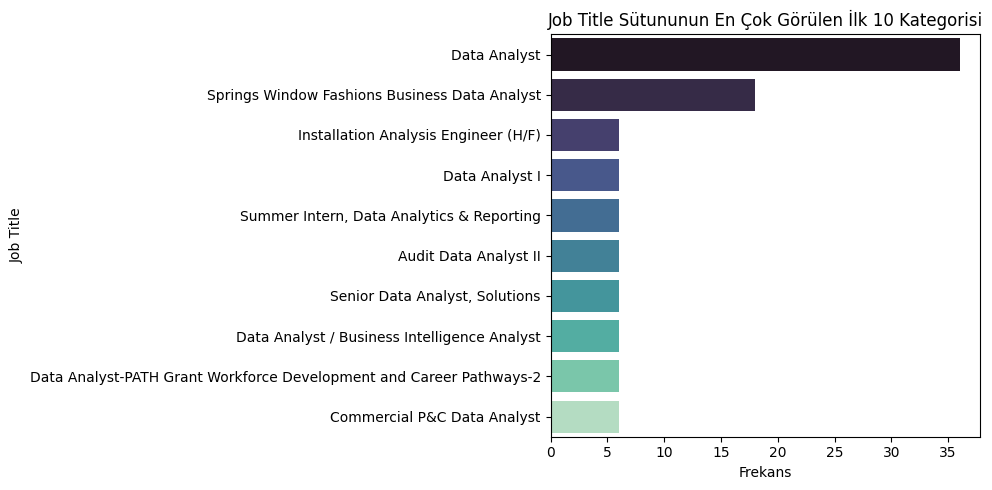


--- Company ---
Company
Goldman Sachs              36
Centene Corporation        18
2020 Companies             18
BizAway                    12
goFLUENT                    6
Dallas College              6
HUB International           6
University of Rochester     6
Legacy Health               6
Oracle                      6
Name: count, dtype: int64


/var/folders/t3/v4nr3hg96mnglt3j6t387ytr0000gn/T/ipykernel_97452/49290380.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette="mako")


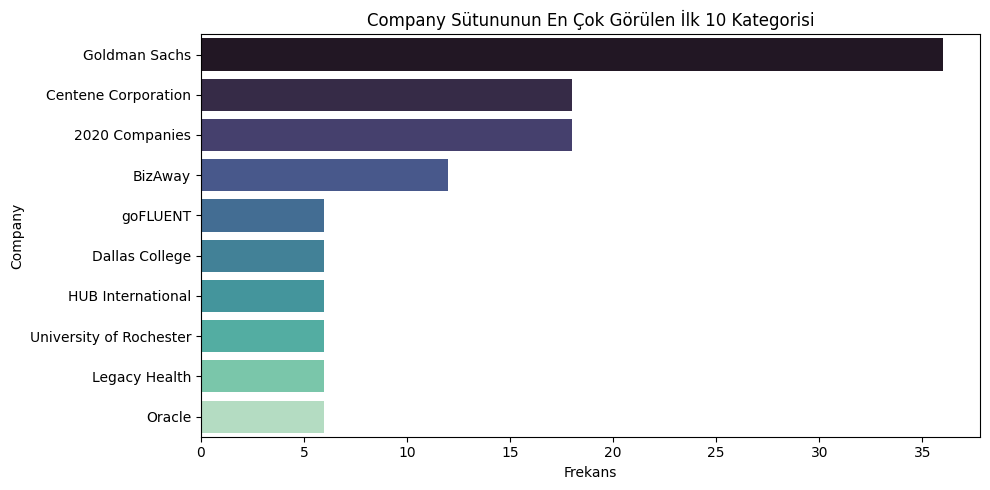


--- Location ---
Location
Remote-MO, United States           18
Hyderabad, Telangana, India        12
Bengaluru, Karnataka, India        12
Yvelines, France                    6
Manila, NCR, Philippines            6
Eastfield Campus, United States     6
Washington, DC, United States       6
Chicago - IL - …                    6
Harkness, United States             6
Southlake, TX, United States        6
Name: count, dtype: int64


/var/folders/t3/v4nr3hg96mnglt3j6t387ytr0000gn/T/ipykernel_97452/49290380.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette="mako")


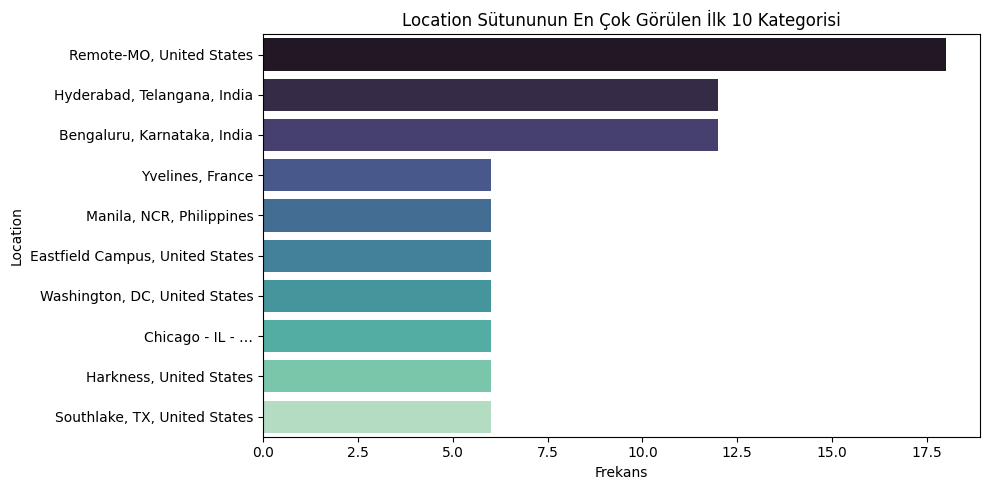


--- Job Type ---
Job Type
Full Time     288
Internship      6
Name: count, dtype: int64


/var/folders/t3/v4nr3hg96mnglt3j6t387ytr0000gn/T/ipykernel_97452/49290380.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette="mako")


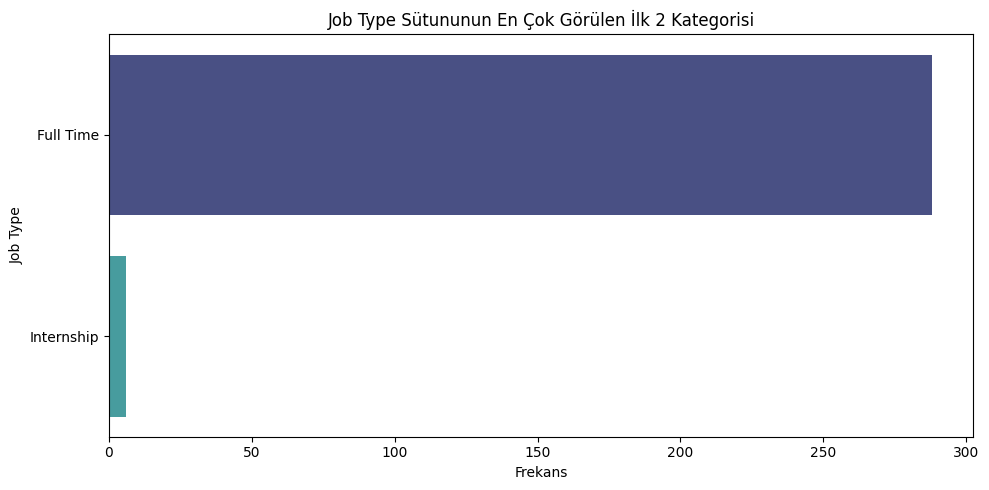


--- Seniority Level ---
Seniority Level
Entry        156
Mid           66
Senior        66
Executive      6
Name: count, dtype: int64


/var/folders/t3/v4nr3hg96mnglt3j6t387ytr0000gn/T/ipykernel_97452/49290380.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette="mako")


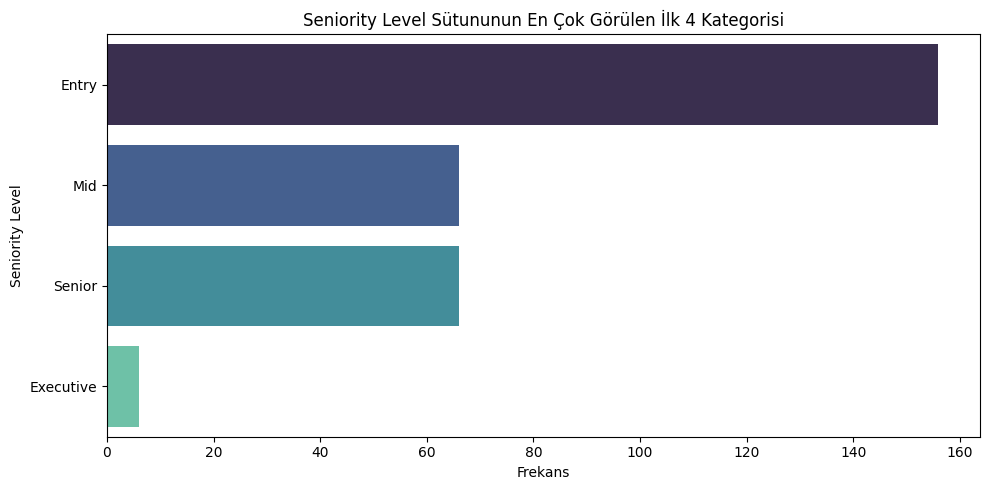


--- Salary Range ---
Salary Range
USD 30K - 56K *     24
USD 66K - 123K *    24
USD 45K - 84K *     18
USD 60K             18
USD 28K - 67K *     12
EUR 38K - 71K *     12
USD 37K - 70K *     12
EUR 43K - 80K *     12
USD 59K - 110K *    12
USD 56K - 105K *    12
Name: count, dtype: int64


/var/folders/t3/v4nr3hg96mnglt3j6t387ytr0000gn/T/ipykernel_97452/49290380.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette="mako")


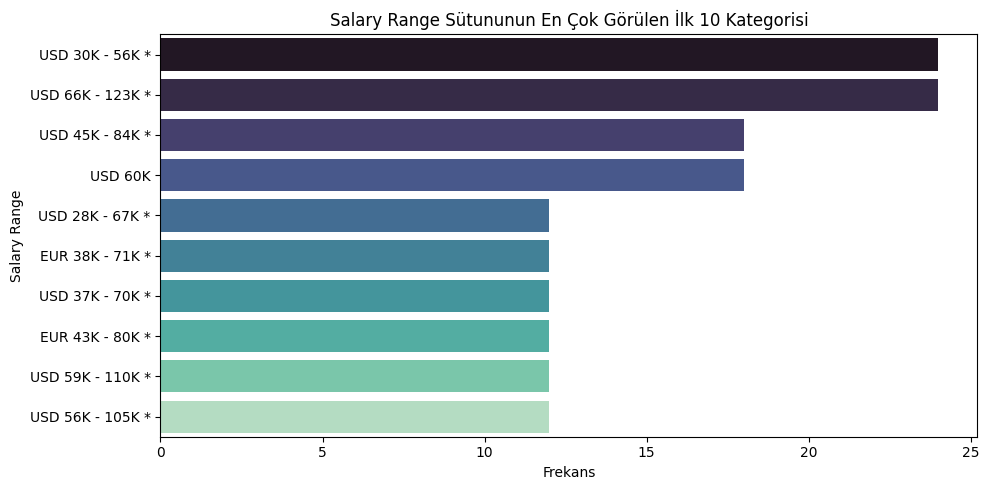


--- Skills ---
Skills
Business Analytics, Computer Science, Consulting, Data analysis, Data Mining, Data visualization, Economics, +13    18
Data analysis, Data visualization, Economics, Engineering, ETL, Finance, KPIs, +4                                   12
Architecture, AWS, Azure, Banking, CI/CD, Distributed Systems, Docker, +14                                          12
Computer Science, Data analysis, Data visualization, ETL, Excel, Mathematics, Python, +3                             6
AWS, Azure, Big Data, BigQuery, Business Intelligence, Computer Science, Data analysis, +28                          6
Banking, Business Intelligence, Computer Science, Data Analytics, Economics, Excel, Finance, +8                      6
Business Analytics, Data analysis, Excel, Power BI, Security, Tableau                                                6
APIs, Data analysis, Data Analytics, Data quality, Excel, Power BI, SharePoint                                       6
Data analysis, Economics,

/var/folders/t3/v4nr3hg96mnglt3j6t387ytr0000gn/T/ipykernel_97452/49290380.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette="mako")


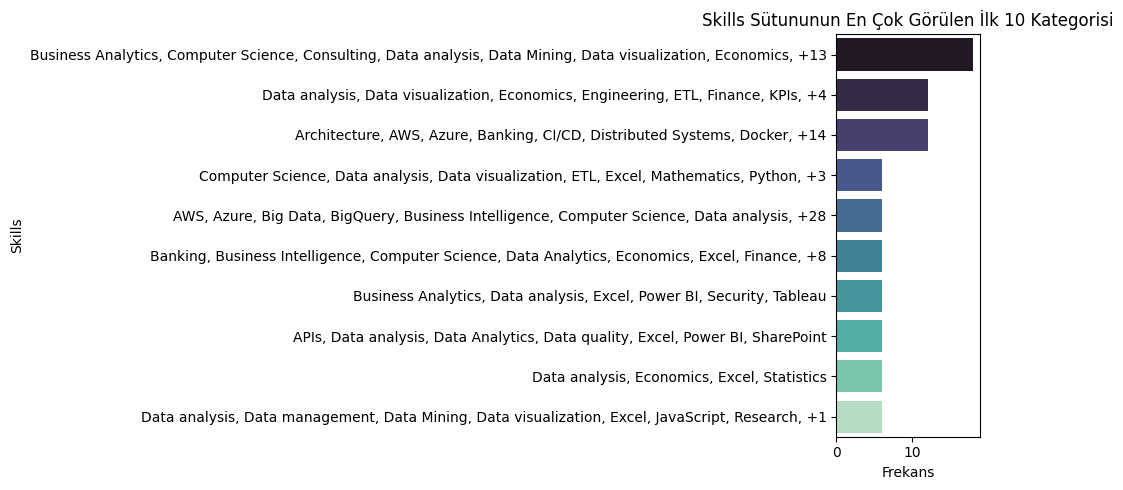

In [15]:
# Select categoric columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Chart showing the first 10 categories (or less) for each category column
for col in categorical_columns:
    print(f"\n--- {col} ---")
    top_10 = df[col].value_counts(dropna=False).head(10)
    print(top_10)

    kategori_sayisi = len(top_10)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_10.values, y=top_10.index, palette="mako")
    plt.title(f"{col} Sütununun En Çok Görülen İlk {kategori_sayisi} Kategorisi")
    plt.xlabel("Frekans")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()



### HTML Rapor

In [18]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Veri Seti Raporu", explorative=True)
profile.to_file("veri_seti_raporu.html")  # ya da .pdf için ek ayar gerekebilir


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ydata_profiling/profile_report.py:365: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 424.27it/s]
